<a href="https://colab.research.google.com/github/Cherrymmu/AIFFEL_Online_Quest_Cherry/blob/main/%EB%A9%94%EC%9D%B8%ED%80%98%EC%8A%A4%ED%8A%B82/1_%F0%9F%A6%84_%E1%84%80%E1%85%A1%E1%84%85%E1%85%A1%E1%86%BA%2C_%E1%84%86%E1%85%A9%E1%86%AB%E1%84%89%E1%85%B3%E1%84%90%E1%85%A5%E1%84%87%E1%85%A9%E1%86%AF!_%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%89%E1%85%A5%E1%86%AF%E1%84%8B%E1%85%B4_%E1%84%91%E1%85%A9%E1%84%8F%E1%85%A6%E1%86%BA%E1%84%86%E1%85%A9%E1%86%AB_%E1%84%8E%E1%85%A1%E1%86%BD%E1%84%8B%E1%85%A1_%E1%84%89%E1%85%A1%E1%86%B7%E1%84%86%E1%85%A1%E1%86%AB%E1%84%85%E1%85%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 🦄 가랏, 몬스터볼! 전설의 포켓몬 찾아 삼만리

1-3. 포켓몬, 그 데이터는 어디서 구할까?
자, 포켓몬의 특성을 이용해서 전설의 포켓몬을 구별해내기 프로젝트, 바로 시작해 보겠습니다.
가장 먼저 필요한 것은 무엇인가요?! 🤔

네, 당연히 포켓몬 데이터셋이겠죠! 데이터셋을 구해 보겠습니다.
우리는 캐글(Kaggle)이라는 데이터 분석 경진대회 사이트에 올라와 있는 데이터셋을 활용할 예정입니다. 다음 링크로 들어가서 포켓몬 데이터셋을 한번 구경해 보죠.

[캐글] Pokemon with stats
https://www.kaggle.com/datasets/abcsds/pokemon

1-4. 포켓몬 데이터 불러오기
---

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [ ]:
import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)
print('슝=3')

슝=3


In [ ]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [ ]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon['Legendary'] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


1-5. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (1) 결측치와 전체 칼럼
---

In [ ]:
# 결측치 확인
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

데이터가 800개이고, 컬럼이 13개로 큰 데이터셋이 아니므로, 최대한 모든 데이터들을 하나하나 이해해 볼 수 있겠습니다.

데이터셋의 전체 컬럼을 출력하면 다음과 같습니다.



In [ ]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

위에서도 살펴봤지만, 다시 한번 자세하게 짚고 넘어가죠. 각 컬럼이 나타내는 바와 데이터 타입은 다음과 같습니다.

- '#' : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 '#'값을 가진다. int
- Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str
- Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str
- Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str
- Total : 전체 6가지 스탯의 총합. int
- HP : 포켓몬의 체력. int
- Attack : 물리 공격력. (scratch, punch 등) int
- Defense : 물리 공격에 대한 방어력. int
- Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int
- Sp. Def : 특수 공격에 대한 방어력. int
- Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int
- Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int
- Legendary : 전설의 포켓몬 여부. !! Target feature !! bool

1-6. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (2) ID와 이름
---

#### : ID number
가장 첫 번째 컬럼입니다. 바로 #이라고 쓰여있는, ID 컬럼이죠.
총 몇 종류의 # 값이 있는지 확인해 보겠습니다.

In [ ]:
len(set(pokemon["#"]))

721

전체 데이터는 총 800개인데 #컬럼을 집합으로 만든 자료형은 그보다 작은 721개의 데이터를 가집니다. 파이썬의 집합(set) 자료형은 중복 데이터를 가질 수 없죠? 따라서 집합의 크기가 800이 아니라 721이므로 # 컬럼의 값은 unique하지 않으며(index로 쓸 수 없으며), 같은 번호를 가지는 컬럼들이 있음을 알 수 있습니다.
같은 # 값을 가지는 포켓몬을 확인해 볼까요?


In [ ]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


Name : 이름
이름은 문자열로 나타나는 데이터입니다.
모든 포켓몬은 이름을 갖고 있죠. 특별하게 확인할 것은 아직 없는 것 같고, 혹시 모든 이름이 유일한 이름인지만 확인해 볼까요?

다음과 같이 pokemon["Name"]을 집합(set)으로 만들어 준 후 길이(len)를 확인하면 중복이 사라지면서 유일한 이름의 개수를 확인할 수 있습니다.

In [ ]:
# Q. 총 몇 종류의 포켓몬 이름이 있는지 확인해봅시다!
len(set(pokemon['Name']))

800

1-7. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (3) 포켓몬의 속성
---
Type 1 & Type 2 : 포켓몬의 속성
이제 포켓몬의 속성 차례입니다.
맨 처음에 피카츄(전기), 파이리(불) 등의 간판 포켓몬들을 보면서 각 포켓몬에게 속성이 존재한다는 것을 알았죠.

저희의 데이터셋에도 각 포켓몬의 속성이 나타납니다. 무작위로 두 마리의 포켓몬을 한번 살펴보겠습니다.

In [ ]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Ice,Psychic,Ghost,Dragon,Dark,Steel,Flying,Fire,Fighting,Rock
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,True,True,False,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,...,False,False,False,False,False,False,False,False,False,False


6번 포켓몬인 Charizard는 Fire와 Flying 속성 두 가지를, 8번 포켓몬인 Wartortle은 Water 속성 단 한 가지만 가지는군요.

전체를 살펴봐야 하지만, 몇 개를 더 찍어봐도 포켓몬이 가지는 속성은 기본적으로 하나, 또는 최대 두 개까지 가질 수 있는 것을 알 수 있습니다. 특히, 데이터셋에서 한 개의 속성을 가지는 포켓몬은 Type 1에만 속성이 표시되고 Type 2에는 NaN값이 들어가 있습니다.

그렇다면, 각 속성의 종류는 총 몇 가지인지 알아봅시다.

In [ ]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

Type 1에는 총 18가지, Type 2에는 총 19가지의 속성이 들어가 있는데, 여기서 Type 2가 한 가지 더 많은 것은 뭘까요?

각자를 집합으로 만들어 차집합을 확인해 봅시다.
https://www.w3schools.com/python/ref_set_difference.asp

In [ ]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

둘의 차집합은 바로 NaN 값이군요.
따라서 NaN 데이터 외의 나머지 18가지 속성은 Type 1, Type 2 모두 같은 세트의 데이터가 들어가 있음을 알 수 있습니다.

포켓몬들의 모든 Type을 types 변수에 저장하겠습니다.

In [ ]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Water', 'Electric', 'Normal', 'Ground', 'Poison', 'Grass', 'Bug', 'Fairy', 'Ice', 'Psychic', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Flying', 'Fire', 'Fighting', 'Rock']


그렇다면 Type을 하나만 가지고 있는 포켓몬은 몇 마리일까요?
Type이 단 하나뿐이라면 Type 2는 NaN 값일 것일 겁니다. Type 2가 NaN인 포켓몬의 수를 구해봅시다.

데이터가 비어있는 NaN값의 개수를 확인하고 싶을 때는 다음과 같이 isna() 함수를 활용하면 됩니다.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html

In [ ]:
pokemon["Type 2"].isna().sum()
#총 386개의 포켓몬은 속성을 하나만 가지고, 나머지는 두 개의 속성을 가지는군요!

386

Type 1 데이터 분포 plot
일반 포켓몬과 전설의 포켓몬 속성 분포가 각각 어떤지 확인하겠습니다.
우리의 데이터는 일반 포켓몬보다 전설의 포켓몬 수가 매우 적은 불균형 데이터이기 때문에, 전설의 포켓몬은 따로 시각화해 주는 것이 좋을 것 같군요.

다음과 같이 plt의 subplot을 활용해서 두 개의 그래프를 한 번에 그리면서, 그래프는 sns(seaborn)의 countplot을 활용하겠습니다.
countplot은 말 그대로 데이터의 개수를 표시하는 플롯입니다.

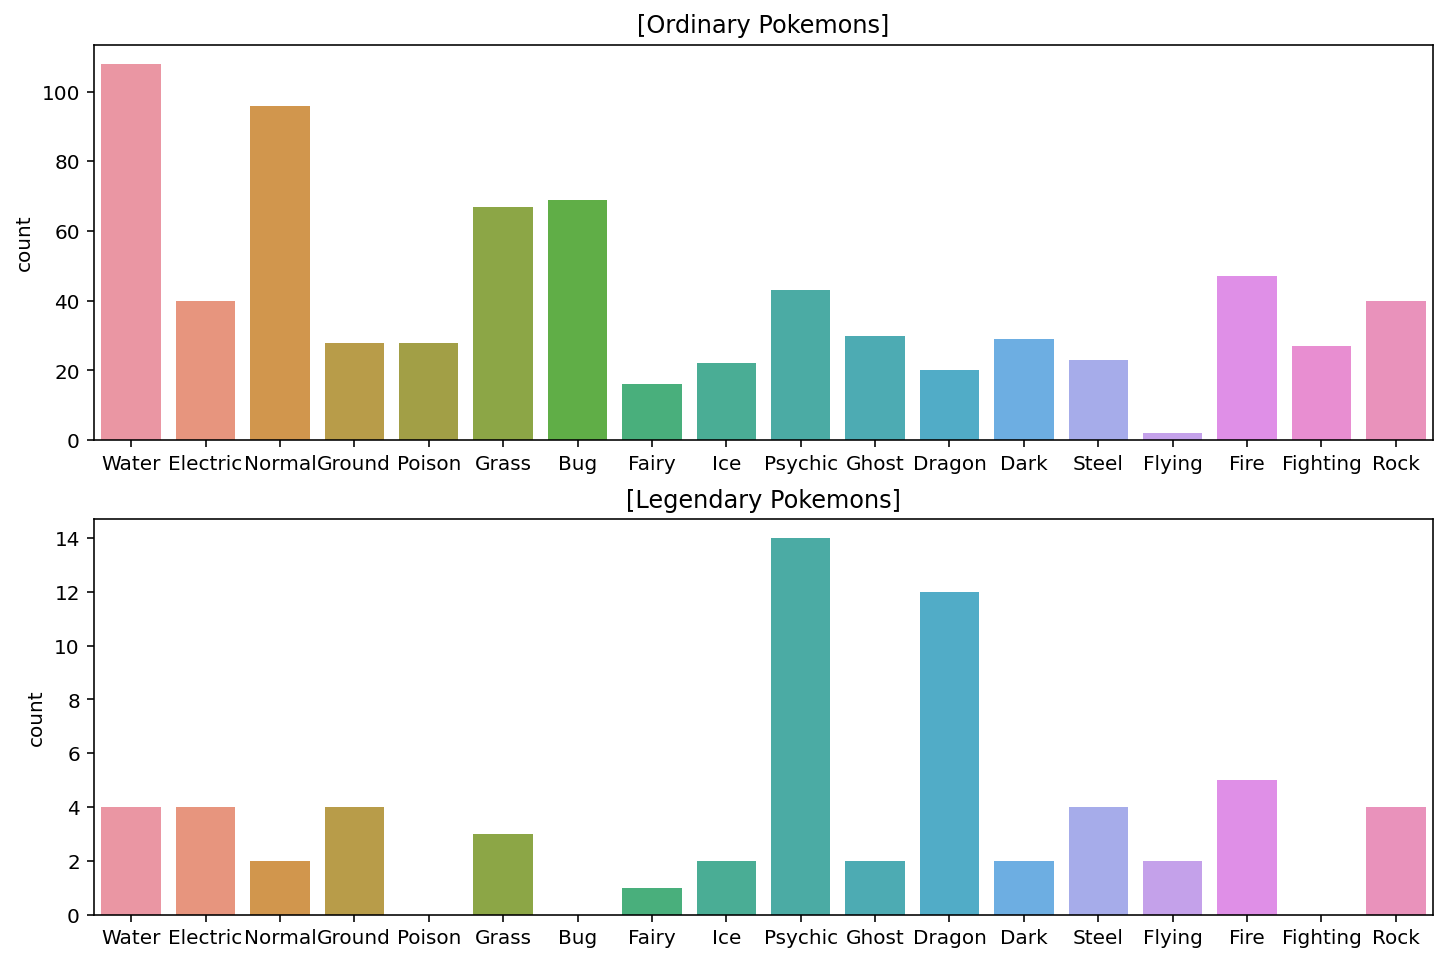

In [ ]:
plt.figure(figsize=(12, 8))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

**Q. 일반 포켓몬의 속성 분포와 전설의 포켓몬의 속성 분포는 어떤 차이가 있나요?**

일반 포켓몬은 물속성(water)의 포켓몬이 많이 존재하고, 레전드 포켓몬은 심령/초자연적속성(psychic)을 많이 가지고 있다.

- 일반 포켓몬에는 물(Water) 속성, 노말(Normal) 속성, 벌레(Bug) 속성 등이 많습니다.
- 반면, 전설의 포켓몬에는 드래곤(Dragon) 속성, 에스퍼(Psychic) 속성이 많습니다.


---

네, 확실히 일반 포켓몬과 전설의 포켓몬 속성 분포에는 차이가 보이는 것 같습니다.
일반 포켓몬에는 Normal, Water의 속성이 가장 많지만, 전설의 포켓몬에는 Dragon, Psychic 속성이 가장 많네요.

그렇다면, 피벗 테이블(pivot table)로 각 속성에 Legendary 포켓몬들이 몇 퍼센트씩 있는지 확인해 봅시다.
sort_value를 활용해 높은 것부터 낮은 순으로 정렬해 보았습니다.

In [ ]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


Legendary 비율이 가장 높은 속성은 Flying으로, 50%의 비율을 갖습니다.
날아다니는 포켓몬은 꽤 높은 비율로 전설의 포켓몬임을 알 수 있군요!

Type 2 데이터 분포 plot
그렇다면 Type 2는 어떨까요?
참고로, Type 2에는 NaN(결측값)이 존재했었습니다. Countplot을 그릴 때는 결측값은 자동으로 제외됩니다.

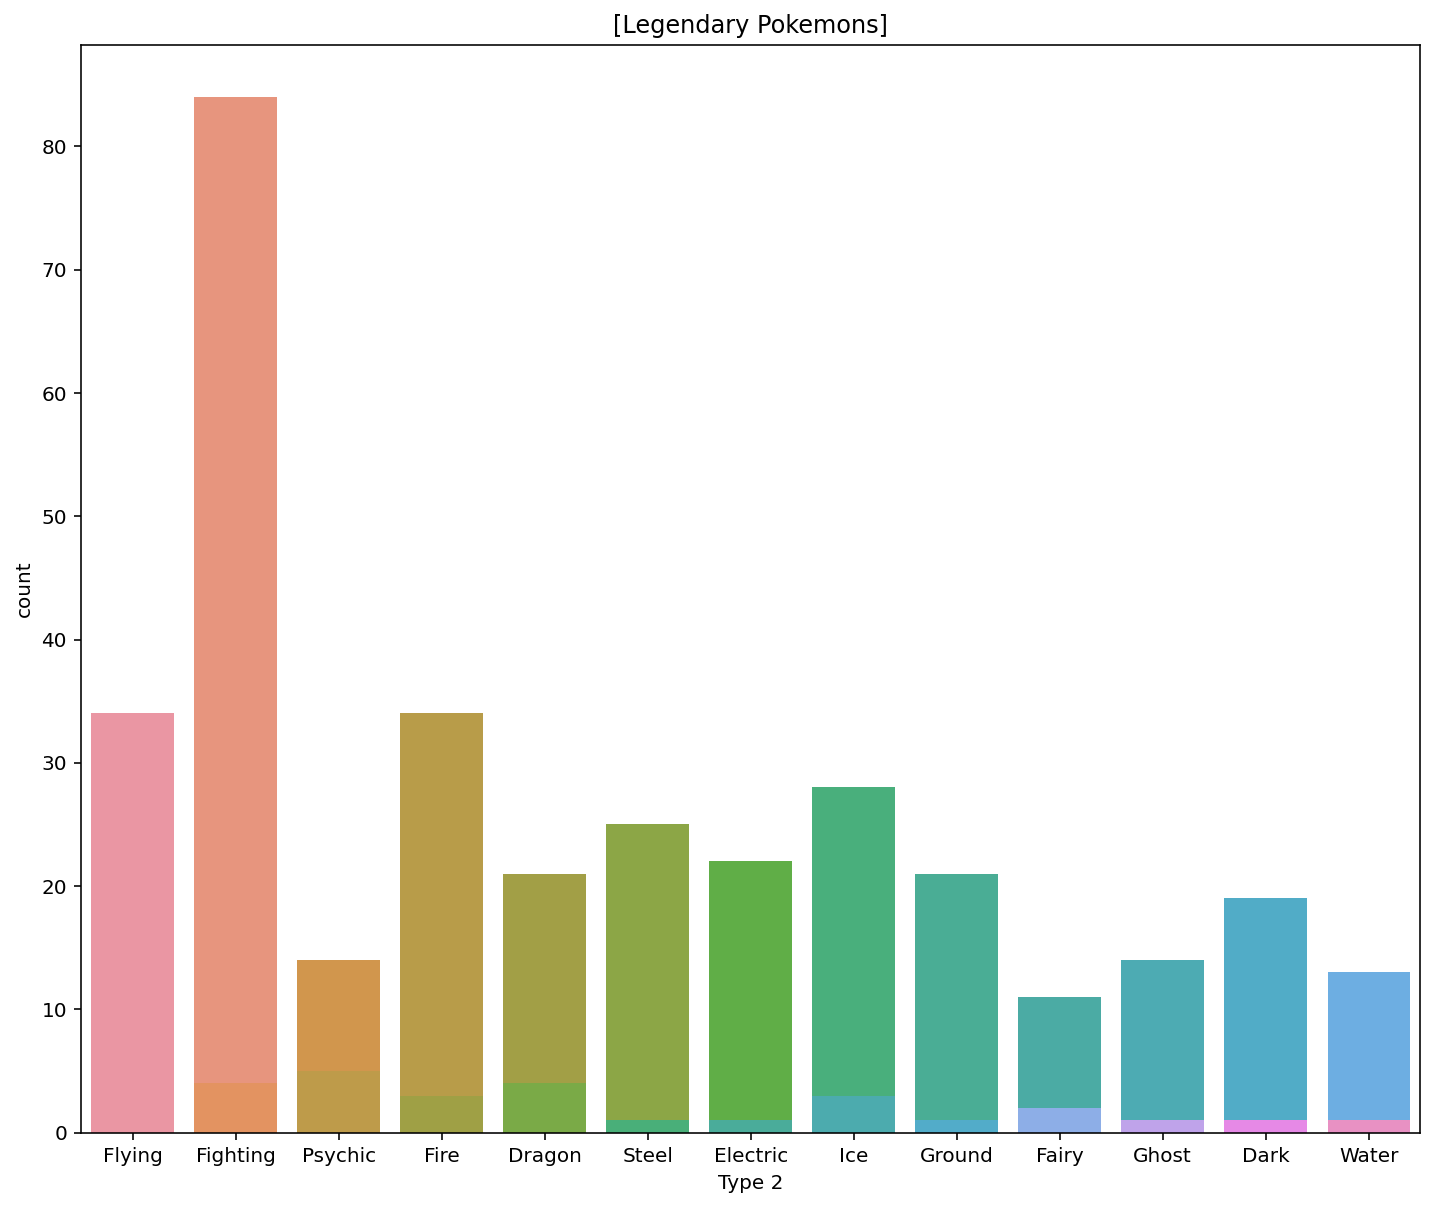

In [ ]:
# Q. 아래 코드의 빈칸을 채워주세요.
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.countplot(data=pokemon[pokemon['Legendary']==False], x='Type 2')
plt.title("[Ordinary Pokemons]")

sns.countplot(data=pokemon[pokemon['Legendary']==True], x='Type 2')
plt.title("[Legendary Pokemons]")

plt.show()

Type 2 또한 일반 포켓몬과 전설의 포켓몬 분포 차이가 보입니다.
Flying 속성의 경우 두 경우 다 가장 많지만, 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 포켓몬은 하나도 없습니다.

대신 여전히 Dragon, Psychic과 더불어 Fighting과 같은 속성이 많습니다.

역시 피벗 테이블로도 확인해 볼까요?

In [ ]:
# Q. Type 2에 대해서도 피벗 테이블을 만들어봅시다.
pivot_table_type2 = pd.DataFrame(pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False))
print(pivot_table_type2)

          Legendary
Type 2             
Fire       0.250000
Dragon     0.222222
Ice        0.214286
Electric   0.166667
Fighting   0.153846
Psychic    0.151515
Flying     0.134021
Fairy      0.086957
Water      0.071429
Ghost      0.071429
Dark       0.050000
Steel      0.045455
Ground     0.028571
Rock       0.000000
Bug        0.000000
Poison     0.000000
Normal     0.000000
Grass      0.000000


Type 2에서는 Fire 속성 포켓몬의 Legendary 비율이 25%로 가장 높습니다.

1-8. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (4) 모든 스탯의 총합
---

Total : 모든 스탯의 총합
데이터셋에서 포켓몬은 총 6가지의 스탯 값을 가집니다. 포켓몬 데이터의 Total 컬럼은 이 6가지 속성값의 총합입니다.

모든 스탯의 종류를 stats라는 변수에 저장해 보겠습니다.

In [ ]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

실제로 6개 스탯의 총합과 데이터에 제공된 Total값이 맞는지 확인해 볼까요? 데이터 분석에서 검증은 필수죠!

코드를 하나하나 따라가 보며 어떤 것을 출력했는지 이해해 보세요.
아래는 첫 번째 포켓몬에 대해 검증하는 코드입니다.

In [ ]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


네, 첫 번째 포켓몬에 대해서는 Total 값이 318로 일치하는군요.

전체 포켓몬에 대해 Total 값이 stats의 총합과 같은지 확인해 봅시다.
아래와 같이 pokemon['Total'].values와 pokemon[stats].values들의 총합이 같은 포켓몬의 개수를 sum으로 확인하겠습니다.
여기서 stats의 경우에는 포켓몬마다 가로 방향으로 더해야 하기 때문에 axis=1이 들어가야 하는 것을 주목하세요!

In [ ]:
# Q. 'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수를 확인해봅시다.
np.sum(pokemon['Total'].values == pokemon[stats].sum(axis=1).values)

800

네, Total값과 모든 stats의 총합이 같은 포켓몬은 전체 데이터의 수와 같은 800마리군요.
전부 다 같은 것을 확인하였습니다.

Total값에 따른 분포 plot
그렇다면 Total 값과 Legendary 는 어떤 관계가 있을지 확인해 봅시다.

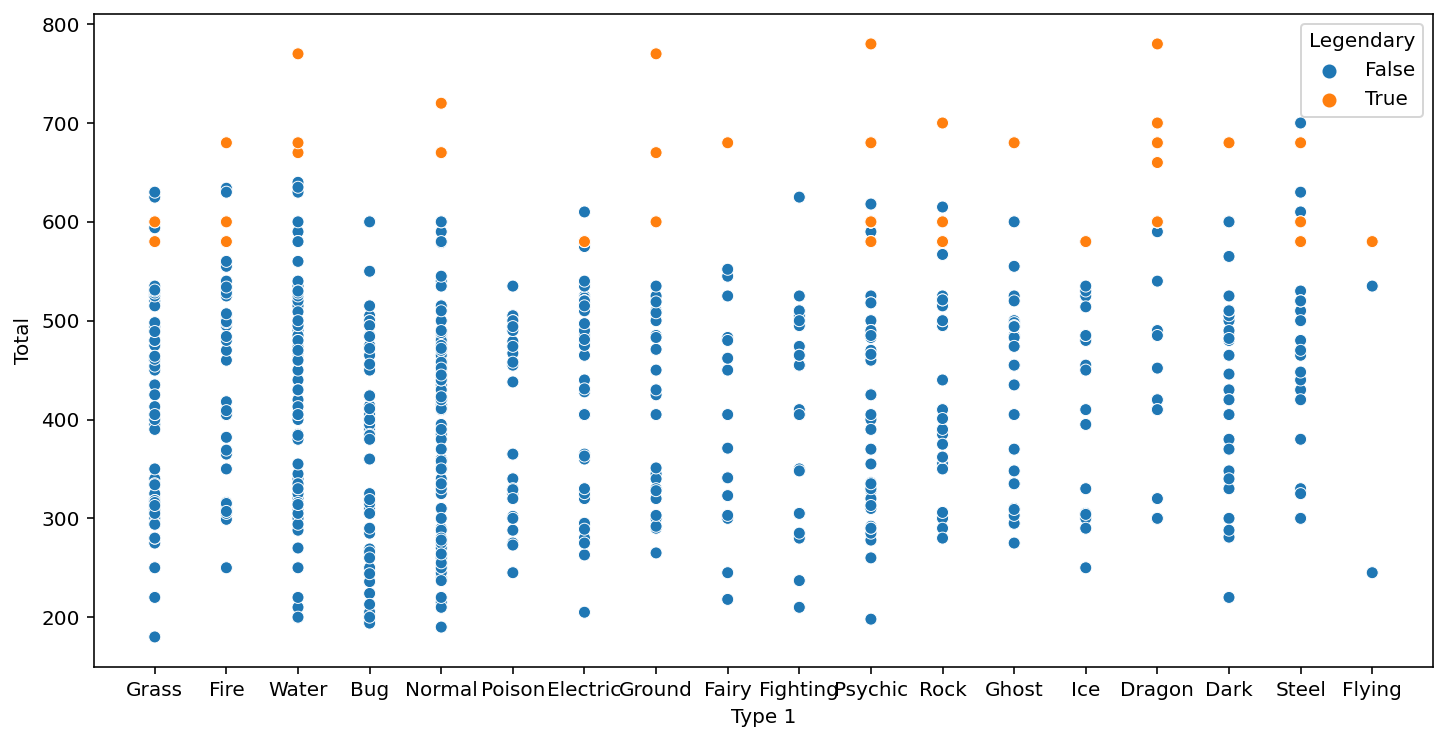

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

1-9. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (5) 세부 스탯
-----
세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

그렇다면 각각의 스탯 값은 어떻게 분포되어 있을까요? subplot으로 여러 그래프를 한 번에 확인해 봅시다.

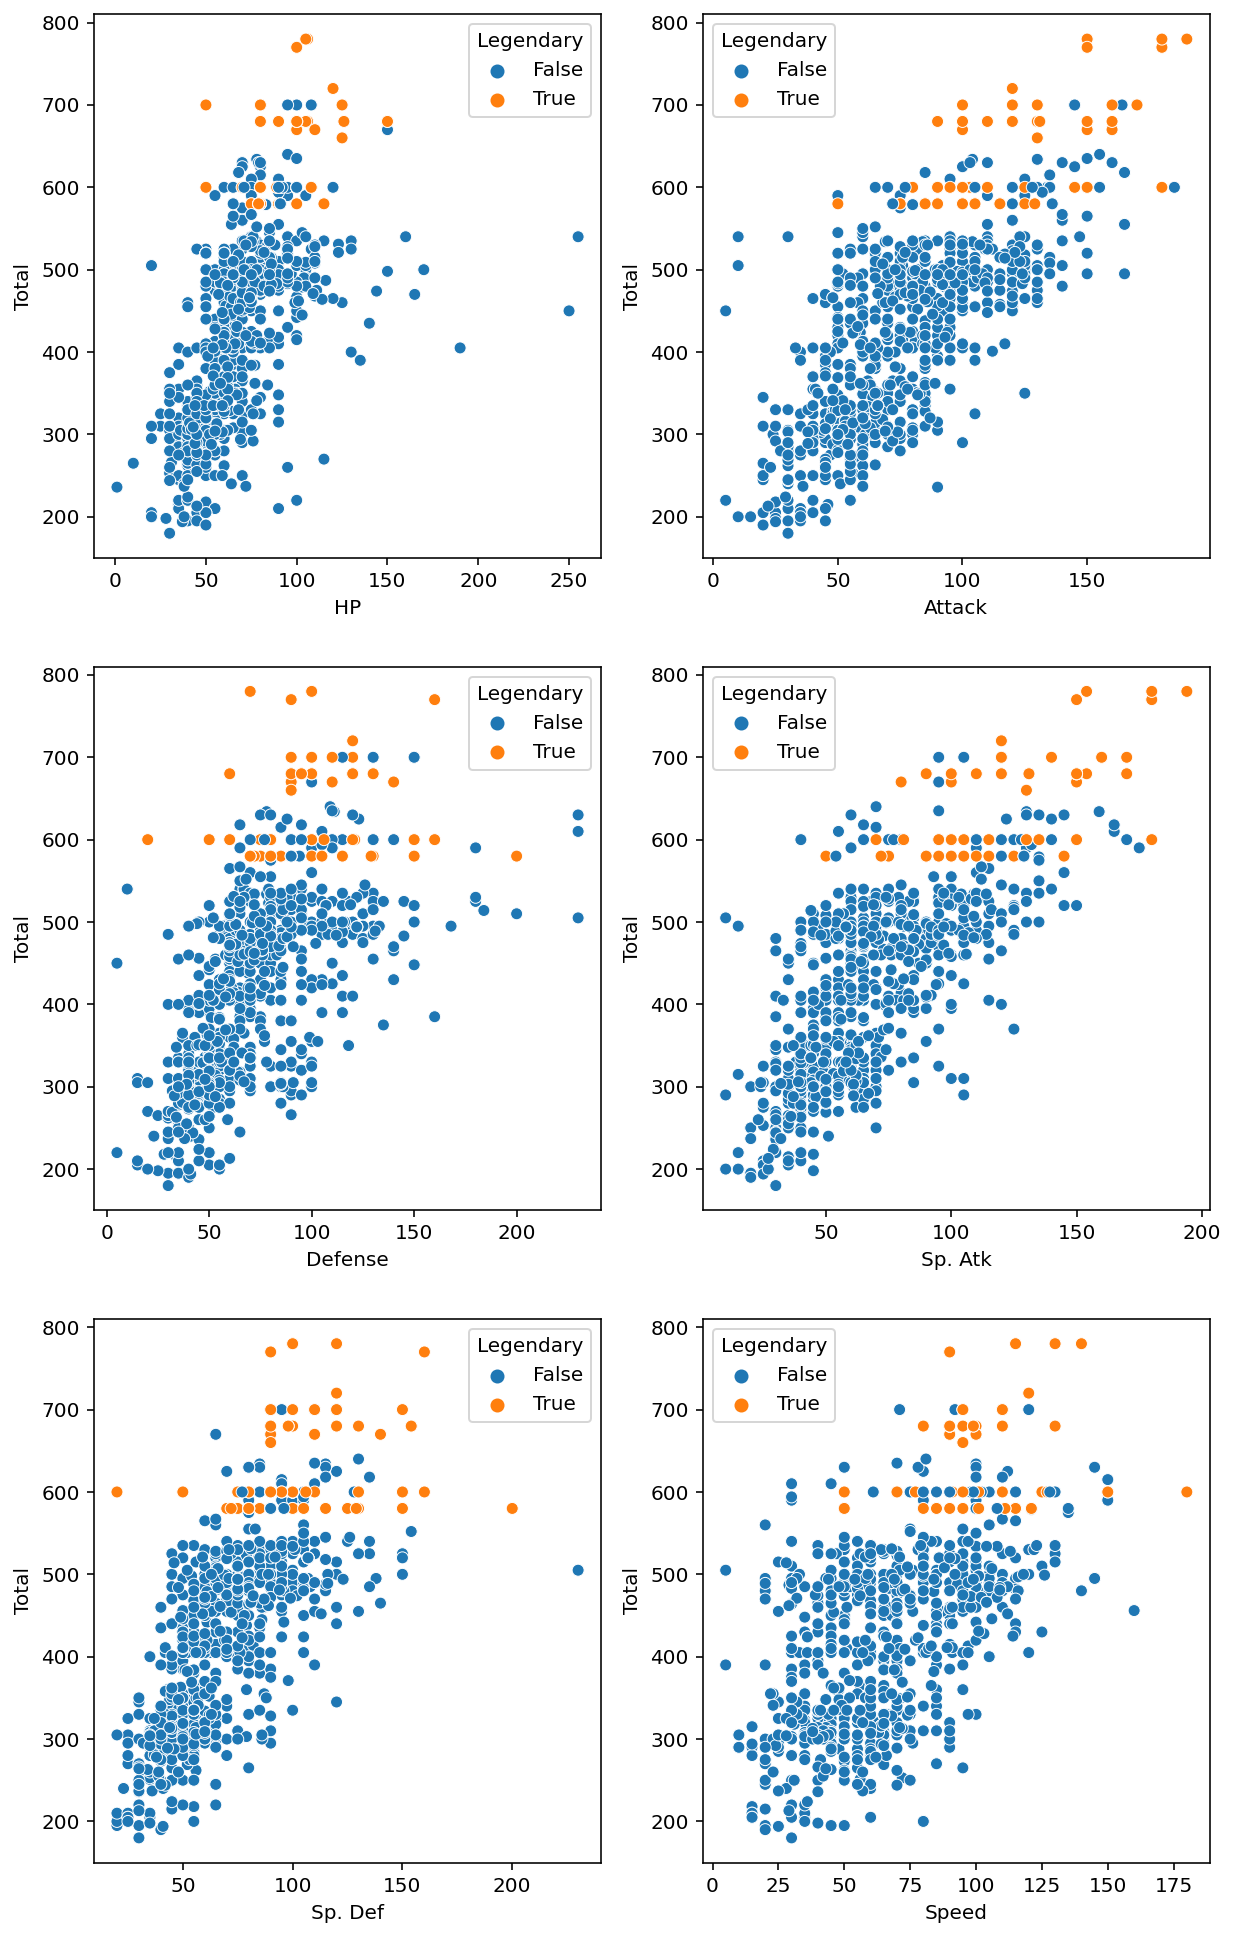

In [ ]:
# Q. 다음 코드의 빈칸을 채워주세요.
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(10, 17)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Attack', hue='Legendary', ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Defense', hue='Legendary', ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Sp. Atk', hue='Legendary', ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Sp. Def', hue='Legendary', ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Speed', hue='Legendary', ax=ax6)

plt.show()

각 스탯에 대한 분석
각각의 스탯을 분석해봅시다.

HP, Defense, Sp. Def
전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있습니다.

그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보입니다. (ex. 방어형, 공격형 등)

Attack, Sp. Atk, Speed
이 세 가지 스탯은 Total과 거의 비례합니다.
전설의 포켓몬이 각 스탯의 최대치를 차지하고 있습니다.


1-10. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (6) 세대
---
Generation : 포켓몬의 세대

Generation은 각 포켓몬의 "세대"로, 현재 데이터셋에는 1~6세대의 포켓몬이 존재합니다.

각 세대에 대한 포켓몬의 수를 확인해 봅시다.

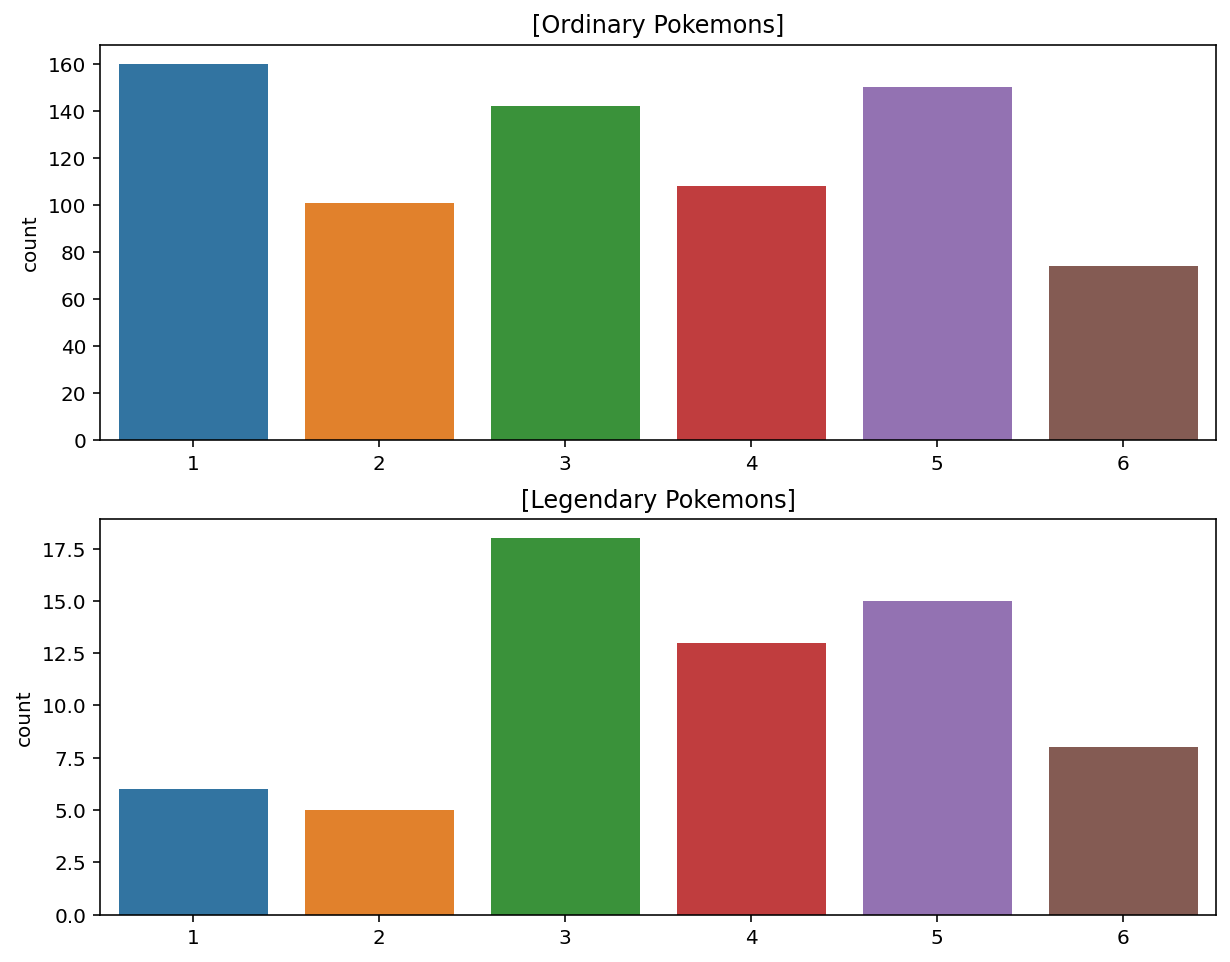

In [ ]:
plt.figure(figsize=(10, 8))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

subplot 예시 01

plt.figure(figsize = (10,10)) # 배경 크기 지정

plt.subplot(211) # 2행 1열의 구조, 첫번째 그래프

plt.subplot(212) # 2행 1열의 구조, 두번째 그래프

plt.show()
[출처] 49. 파이썬 - subplot / subplots 이용해서 그래프 동시에 여러개 그리기|작성자 동이
https://blog.naver.com/PostView.nhn?blogId=bosongmoon&logNo=221779104441

1-11. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (1) Total값
---
지금까지 모든 컬럼의 데이터를 확인하였습니다.

우리의 목표는 전설의 포켓몬을 일반 포켓몬에서 분류해 내는 것이니, 각각이 가지는 특징들을 세분화해서 확인해 봐야겠죠!
이제 특별히 legendary 포켓몬과 Ordinary 포켓몬을 분리해서 각각 분석해 보겠습니다.

전설의 포켓몬의 Total 값
먼저 전설의 포켓몬들의 Total 값을 속성(Type 1)별로 확인해 봅시다.

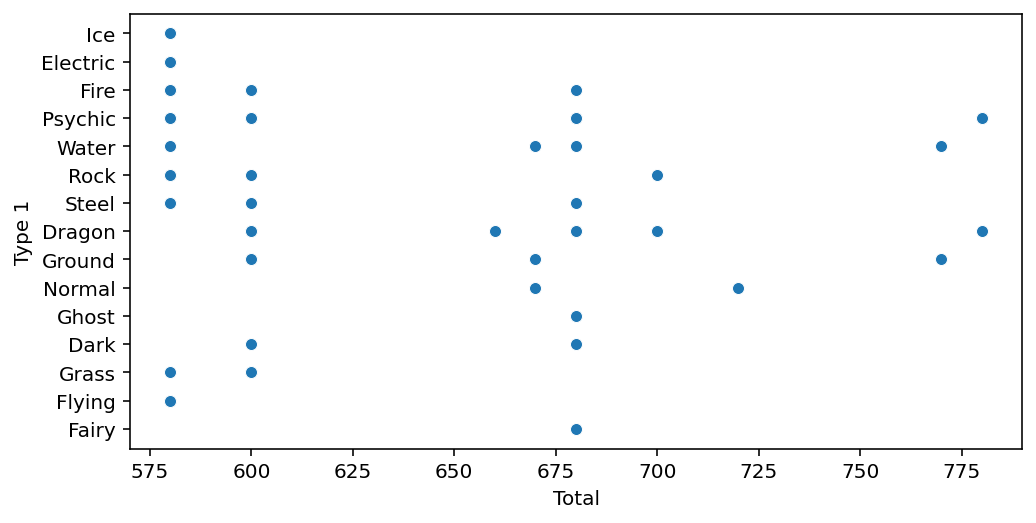

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

앗, 여기서 한 가지 특징이 보이는 것 같습니다.
바로, 전설의 포켓몬들의 Total값들이 600과 같은 특정한 값에 몰려있다는 것이죠! 무언가 이상하지 않나요?

실제로 전설의 포켓몬이 가지는 Total값들의 집합을 확인해 봅시다.

In [ ]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


실제로 단 9가지 값 밖에 존재하지 않는군요!
그래프로도 전설의 포켓몬이 가지는 각 Total값에 대한 포켓몬 수를 확인해 봅시다.

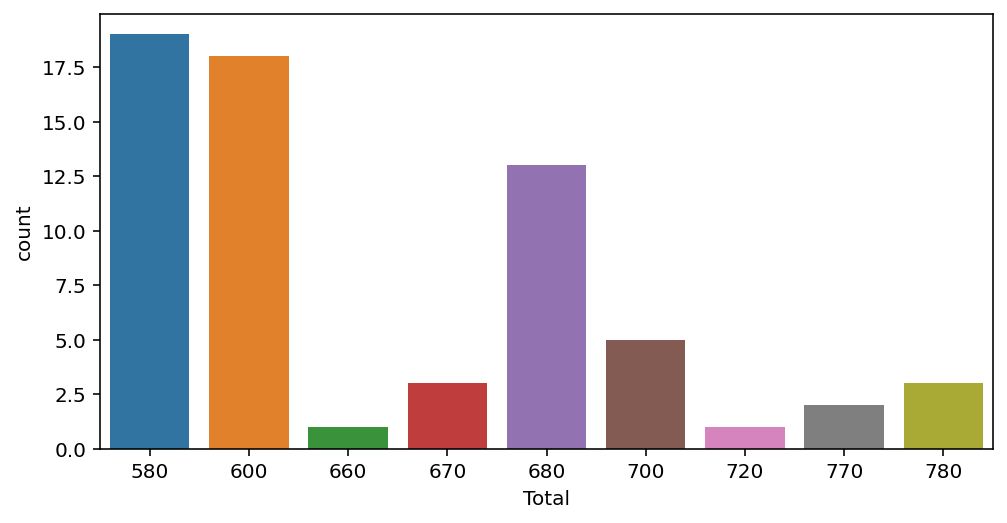

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

흠, 총 65마리의 전설의 포켓몬이 9개의 Total값만 가진다는 것은,

In [ ]:
round(65 / 9, 2)

7.22

약 7.22마리 끼리는 같은 Total 스탯 값을 가진다는 의미와 같습니다. 이는 언뜻 봐도 꽤 높은 값인 것 같은 느낌을 주네요.

그렇다면 ordinary 포켓몬은 어떨까요? 같은 방법으로 다시 확인해 봅시다.

In [ ]:
# Q. ordinary 포켓몬의 'Total' 값 집합을 확인해봅시다.
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [ ]:
# Q. 이 집합의 크기(길이)를 확인해봅시다.
print(len(sorted(list(set(ordinary["Total"])))))

195


일반 포켓몬은 총 195가지의 Total 속성값을 가지고, 전체 일반 포켓몬은 (800 - 65), 즉 735마리이므로,

In [ ]:
round(735 / 195, 2)

3.77

약 3.77마리만 같은 Total 스탯 값을 가지는군요.

이로써 다음의 두 가지를 알 수 있습니다.

Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 됩니다. 즉 전설의 포켓몬의 Total값은 다양하지 않습니다.
: 한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미칩니다.

또한, 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재합니다. ex) 680, 720, 770, 780
: Total값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있습니다.

즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있습니다.

1-12. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (2) 이름
---
데이터를 보고 있으면 한 가지 더 특이한 점이 있습니다. 바로 이름!

전설의 포켓몬들의 이름을 보면, 특정 단어가 들어가 있는 이름, 또는 긴 이름을 가진 경우가 많음을 확인할 수 있습니다.

특정 단어가 들어가 있는 이름

특정 단어가 들어가 있는 이름이 많은지, 바로 확인해 봅시다.

아래 행들은 비슷한 이름을 가진 포켓몬들의 모임입니다. 이들을 pd.concat으로 합쳐보겠습니다.

In [ ]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


어떤가요? 한눈에 봐도 이름들이 비슷한 경향을 띠는 것을 볼 수 있습니다.
이름은 모든 포켓몬이 각각 다른 유일한(unique) 값들로 이루어진 것을 확인했었는데, 전설의 포켓몬 사이에서는 비슷한 이름이 다수 존재하는 거죠.

특히, 아래 이름들은 모두 세트로 이름이 지어져 있다는 것을 어렵지 않게 확인할 수 있습니다.

"MewTwo", "Latias", "Latios", "Kyogre", "Groudon", "Rayquaza", "Kyurem" 등의 포켓몬은 비슷한 이름을 가진 포켓몬이 다수 존재합니다.
또는, 이름에 forme가 들어가는 여러 가지 전설의 포켓몬이 있는 경우도 존재합니다.

In [ ]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


이렇게 이름에 forme가 들어가면 이는 전설의 포켓몬일 확률이 아주 높겠군요!

긴 이름
위와 비슷한 이유로, 전설의 포켓몬은 이름의 길이도 긴 경우가 많습니다.
데이터셋에 이름 길이 컬럼을 생성해서 비교해 보도록 하겠습니다.

legendary와 ordinary 각각에 모두 "name_count"라는 이름의 길이를 나타내는 컬럼을 만들어줍니다. 파이썬 람다(lambda) 기능을 사용해 행마다 이름의 길이를 구하고, 이를 "name_count" 칼럼에 넣어주었습니다.



In [ ]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [ ]:
# Q. ordinary 포켓몬의 데이터에도 'name_count' 값을 추가해줍시다.
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


그렇다면 이 name_count 컬럼은 어떤 특징을 갖게 될까요? 그래프로 확인해 봅니다.

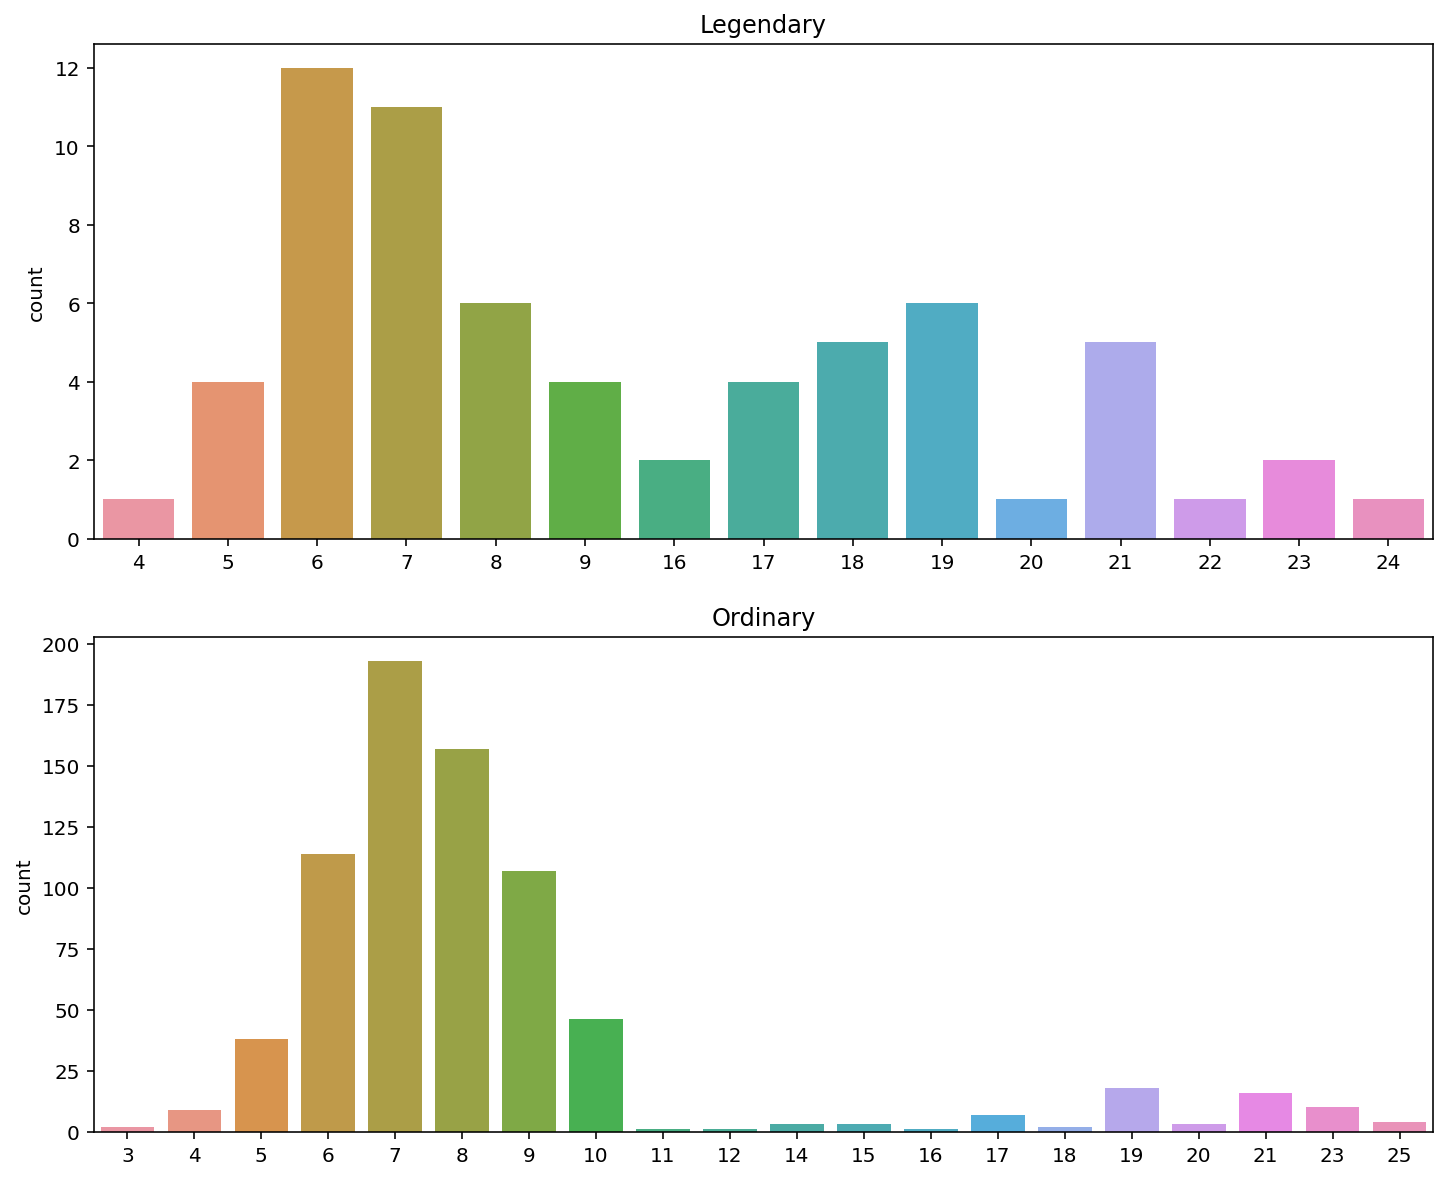

In [ ]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

위에서 볼 수 있듯이, 전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은 반면, 일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮습니다.

전설의 포켓몬의 이름이 10 이상일 확률은 어느 정도일까요?

In [ ]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [ ]:
# 그렇다면 일반 포켓몬은요?
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


전설의 포켓몬의 이름이 10 이상일 확률은 41% 를 넘는 반면에, 일반 포켓몬의 이름이 10 이상일 확률은 약 16% 밖에 안됨을 확인할 수 있습니다!
이는 아주 큰 차이이므로 legendary인지 아닌지를 구분하는 데에 큰 의미가 있습니다.

위의 두 가지, 이름에 대한 분석은 중요한 시사점을 가집니다.

만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬이다!
적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!
전설의 포켓몬은 긴 이름을 가졌을 확률이 높다!

1-13. 모델에 넣기 위해! 데이터 전처리하기 (1) 이름의 길이가 10 이상인가?
---
데이터 분석을 통해 머신러닝을 수행하고 싶다면, 데이터를 모델에 입력할 수 있는 형태로 변환하는 것이 매우 중요합니다.

머신러닝을 수행할 모델은 문자열 데이터를 처리할 수 없기 때문에 이를 적절한 숫자 데이터 또는 True, False를 나타내는 부울(bool) 데이터 등으로 전처리하는 과정이 필요합니다.
따라서 지금까지 수행한 EDA 결과에 따라 이름 컬럼을 모델이 연산할 수 있는 형태로 처리를 해 보도록 하겠습니다.

앞서 확인한 EDA 과정에서 이름은 전설의 포켓몬인지 아닌지를 결정하는 중요한 특징 중 하나였죠.
따라서 이름에 관해서는 두 가지를 중점적으로 처리하겠습니다.

1. 이름의 길이 : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성

2. 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리

(1) 이름의 길이가 10 이상인가 아닌가
이름의 길이를 확인할 수 있는 name_count 컬럼을 생성합니다. 아까 생성한 방법과 같지만, 이번엔 전체 데이터가 있는 pokemon 데이터 프레임에 생성합니다.

In [ ]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [ ]:
# 또한 이름의 길이가 10 이상이면 True, 미만이면 False를 가지는 long_name 컬럼을 생성합니다.
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


1-14. 모델에 넣기 위해! 데이터 전처리하기 (2) 이름에 자주 쓰이는 토큰 추출
---
다음으로 할 일은 전설의 포켓몬 이름에 가장 많이 쓰이는 토큰을 알아보고 이에 대한 새로운 컬럼을 만드는 것입니다.
이름에 어떤 토큰이 있으면 전설의 포켓몬일 확률이 높을지를 찾아보는 것이죠.

토큰을 추출하기에 앞서, 포켓몬의 이름에 대해 먼저 알아보겠습니다.
포켓몬의 이름은 총 네 가지 타입으로 나뉩니다.

1. 한 단어면 ex. Venusaur
2. 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur
3. 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X
4. 알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme

이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기
이 중 가장 먼저 '알파벳이 아닌 문자'를 포함하는 경우를 처리하도록 하겠습니다.
어떤 문자열이 알파벳으로만 이루어져 있는지를 확인하고 싶을 때는 isalpha() 함수를 사용하면 편리합니다.

pandas의 isalpha() 함수https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isalpha.html
우리는 알파벳이 아닌 문자를 포함하는 이름을 걸러내고 싶은데, 주의할 점은 이름에 띄어쓰기가 있는 경우에도 isalpha() = False로 처리된다는 점입니다.

따라서 알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어준 후, 띄어쓰기를 빈칸으로 처리해서 확인하도록 하겠습니다.

In [ ]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [ ]:
# 모든 띄어쓰기가 없어진 것이 확인되는군요.
# 이제 isalpha() 함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인해 봅시다.

pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [ ]:
# name_isalpha 컬럼이 잘 생성된 것으로 보입니다. 그렇다면 알파벳이 아닌 다른 문자가 이름에 포함된 것은 어떤 것들이 있을까요?

print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


이름에 알파벳이 아닌 것을 포함하는 경우는 9마리뿐이군요.

이 정도면 직접 이름을 바꿔줄 수 있겠습니다. 적당히 합리적으로 바꿔주겠습니다.
문자열을 원하는 다른 문자열로 바꾸고 싶을 때는 pandas의 replace 함수를 사용하면 됩니다.

In [ ]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [ ]:
# 다시 isalpha로 확인해 볼까요?

# Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기
그러면 이제 모든 이름은 세 가지 타입으로 나뉘므로 토큰화(tokenizing)할 수 있습니다.
이름에 있는 토큰을 추출하기 위해 이름을 토큰화 (모든 토큰으로 분리) 할 수 있는 함수를 생성해 주겠습니다.

문자열을 처리할 때는 주로 정규표현식(RegEx: Regular Expression) 이라는 기법이 사용됩니다.
정규표현식이란 문자열을 처리하는 방법의 하나로, 특정한 조건을 만족하는 문자를 검색하거나 치환하는 등의 작업을 하고 싶을 때 간편하게 처리할 수 있게 해주는 도구입니다.

정규표현식은 문자열을 다룰 때 아주 유용한 도구지만, 사실 깊게 들어가면 아주 복잡하고 어렵습니다.
따라서 오늘은 맛보기와 같은 형태로 코드를 받아들이면서 진행해 보겠습니다.

파이썬은 정규표현식을 re라는 패키지에서 지원합니다. 다음 페이지에서 re에 대해 간단히 살펴보고 올까요?
https://wikidocs.net/4308

Q. "a.b"는 무엇을 의미하나요?

"a + 모든_문자 + b"

- "a + 모든문자 + b" 를 의미합니다. 즉, "aab", "a0b" 등 a와 b 사이에 어떤 문자가 와도 이 정규식과 매치가 됩니다.
- 다만, "abc"와 같은 문자는 a와 b 사이에 문자가 없기 때문에 이 정규식과 매치되지 않습니다.

In [ ]:
# 그러면 정규식 re 패키지를 사용해 봅시다.

import re

우리가 원하는 것은 CharizardMega Charizard X와 같은 이름을 적절히 쪼개서 리스트로 만드는 것입니다.

다음 이름을 예제로 한 단계씩 천천히 분해해 보겠습니다.






In [ ]:
name = "CharizardMega Charizard X"

In [ ]:
# 먼저 이름을 공백을 기준으로 쪼개보겠습니다. 쪼개는 것은 split 함수로 간단히 할 수 있습니다.

name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

네, 공백을 기준으로 이름을 쪼개는 것은 간단합니다.

하지만 여기서 한 가지 더 해야 하는 일은 맨 처음 요소인 CharizardMega 를 Charizard와 Mega로 나누는 것입니다.
그러기 위해서는 대문자를 기준으로 분리를 하면 될 것 같습니다.

name_split 리스트 안에 있는 첫 번째 요소를 쪼개고 싶으므로 temp에 저장하겠습니다.

In [ ]:
temp = name_split[0]
temp

'CharizardMega'

이 붙어있는 이름을 우리는 대문자로 시작해서 소문자로 끝나는 토큰들로 분리하고 싶습니다.
그러기 위해서는 대문자로 시작해서 소문자로 끝나는 패턴을 찾으면 됩니다.

패턴을 찾는 것은 앞서 import 한 re 패키지의 findall 함수를 이용해서 실행할 수 있습니다.

In [ ]:
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

성공적으로 잘렸군요!
여기서 [A-Z][a-z]* 라는 이상한 패턴이 쓰였습니다! 이것이 바로 정규표현식입니다.

세부 의미는 다음과 같습니다.

[A-Z] : A부터 Z까지의 대문자 중 한 가지로 시작하고,
[a-z] : 그 뒤에 a부터 z까지의 소문자 중 한 가지가 붙는데,
* : 그 소문자의 개수는 하나 이상인 패턴 (*는 정규표현식 중에서 "반복"을 나타내는 기호)
따라서 첫 글자가 대문자인 단어들을 분리하는 데에 효과적인 거죠.

지금까지 한 과정을 반복문으로 합치면 한 개의 이름을 이루고 있는 모든 토큰을 tokens에 모아둘 수 있습니다.

In [ ]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

위 코드는 한 개의 이름을 토큰화할 수 있는 코드였습니다.
이제 지금까지 진행한 토큰화 과정을 모든 이름에 적용시킬 수 있도록 함수를 만들어서 전체 데이터셋에 적용하겠습니다.

In [ ]:
# Q. 다음 코드의 빈칸을 채워주세요.
def tokenize(name):
    name_split = name.split(" ")
    tokens = []

    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    return np.array(tokens)

In [ ]:
# 함수를 이용해서 간단한 코드로 이름을 토큰화해 볼까요?

name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [ ]:
# tokenize(name)라는 간단한 코드로 이름을 모두 토큰화할 수 있습니다!

이를 이제 전설의 포켓몬 데이터셋에 적용시켜서, 전설의 포켓몬의 이름에 사용된 토큰을 모아보겠습니다.
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

중복된 것을 제외하면 총 65개의 토큰이 있군요. 여기서 많이 사용된 토큰을 추출해 보겠습니다.

list 또는 set의 자료형에서 각 요소의 개수를 다루고 싶을 때에는 파이썬의 collection이라는 패키지를 사용하면 편리합니다.
collection은 순서가 있는 딕셔너리인 OrderedDict, 요소의 개수를 카운트하는 Counter 등 여러 다양한 모듈을 제공합니다.

이 중 우리는 토큰이 사용된 개수를 알고 싶기 때문에 Counter 객체를 사용할 것입니다.
다음에서 Counter에 관한 간단한 설명을 읽어보시죠.

Counter

Q. my_list = ['a', 'd', 'c', 'a', 'b']라는 리스트를 가지고 있을 경우,

my_counter = collections.Counter(my_list)로 Counter 객체를 생성하면 my_counter에는 어떤 결과가 담기나요?

직접 사용하며 Counter를 조금 더 직관적으로 이해해 보겠습니다.
먼저 collections 모듈에 있는 Counter를 가져옵니다.

In [ ]:
from collections import Counter

In [ ]:
# Counter 객체는 다음과 같이 각 요소가 몇 개인지를 담은 튜플 리스트를 반환합니다.

a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [ ]:
# 또한, most_common을 활용하면 가장 많은 요소와 등장 횟수가 무엇인지를 정렬해 주기도 하죠.

Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

이를 활용해서 우리의 token_set에는 어떤 토큰이 가장 많이 쓰였는지 찾아보겠습니다.

most_common() 함수에 인자로 숫자를 넣어주면 원하는 개수만큼만 출력할 수 있습니다.
10개만 추려보겠습니다.

In [ ]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

전설의 포켓몬 이름에는 Forme가 15번이나 쓰였고, 진화를 했을 때 붙는 이름인 Mega도 6번 쓰였군요!
전체 65마리밖에 되지 않는 전설의 포켓몬에서 저 정도의 횟수라면 꽤나 많이 쓰였다고 볼 수 있겠습니다.

이제 마지막으로 이렇게 전설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼을 만들겠습니다.
Pandas에서 문자열 데이터셋에 특정 구문이 포함되어 있는지 여부는 str.contains 함수로 간단히 확인할 수 있습니다.

In [ ]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


이름에 맞게 True 또는 False가 처리된 것을 확인할 수 있습니다.
이제 전설의 포켓몬이 많이 가지는 Forme와 같은 토큰의 컬럼 값이 True라면 그 포켓몬은 전설의 포켓몬일 확률이 높다고 판단할 수 있겠군요!

여기까지 문자열로 구성된 이름을 전처리를 통해 True, False의 부울 데이터로 변환시켜 보았습니다.
머신러닝 모델 학습에서 문자열 데이터는 소중한 정보를 가지고 있지만, 문자열 그대로 학습에 사용할 수는 없습니다. 이렇게 적절한 방법을 통해서 문자열 데이터를 숫자나 부울 데이터로 변환해서 정보를 넣어주면 모델의 성능을 올리는 데에 도움을 줄 수 있습니다.

1-15. 모델에 넣기 위해! 데이터 전처리하기 (3) Type1 & 2! 범주형 데이터 전처리하기
---
이제 범주형 데이터인 Type 컬럼을 처리해 보죠.
Type은 한 가지 속성을 가지느냐, 두 가지를 가지느냐에 따라 NaN값이 있을 수도 없을 수도 있습니다.

따라서 다음과 같은 규칙으로 범주형 데이터를 전처리해 주도록 하겠습니다.

18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)합니다.
두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 합니다.
여기에서 원-핫 인코딩이란, 주어진 카테고리 중 단 하나만 1(True), 나머지는 모두 0(False)으로 나타나도록 인코딩하는 방식을 말합니다.

Type은 범주형 데이터인데요, 범주형 데이터는 그대로 데이터를 처리하기가 힘든 경우가 있습니다. 특히 머신러닝에서 최종적으로 예측하는 값은 숫자이기 때문에 문자열로 이루어진 범주형 데이터를 그대로 이용할 수 없습니다. 범주형 문자열 데이터를 숫자 데이터로 바꾼 뒤에야 학습이나 예측이 가능합니다.

범주형 데이터를 숫자로 바꾸는 방식은 여러 가지가 있는데, 그 중 대표적인 것이 바로 정수 인코딩(Integer Encoding)과 원-핫 인코딩(One-Hot Encoding)입니다.

Type의 범주에 해당하는 Fire와 Ice, Ground를 숫자로 바꾼다고 가정해 보죠. Fire는 0, Ice는 1로 바꿀 수 있을 거예요. 그럼 Ground는 2가 되겠죠? 이렇게 숫자를 늘려가며 모든 범주형 데이터를 바꿀 수 있습니다. 이 방식이 정수 인코딩입니다.

그런데 정수 인코딩에는 한 가지 큰 문제가 있습니다. 숫자의 대소 관계가 있다는 점인데요, 0이 된 Fire와 1이 된 Ice를 비교해 볼 때 1이 0보다 크므로 마치 Ice가 Fire보다 큰 것처럼 여기게 됩니다. 또 1만큼 떨어진 Fire와 Ice의 관계가 2만큼 떨어진 Fire와 Ground와의 관계보다 가깝다고 여길 수 있다는 것도 문제예요. 그래서 정수 인코딩은 "매우 만족, 만족, 보통, 불만, 매우 불만"처럼 대소 관계가 있는 범주를 변형하는 데에는 적합하지만 그 외에는 좋은 선택이 아닙니다.

그래서 Type에는 원-핫 인코딩을 사용해야 하는데요. 원-핫 인코딩은 모든 범주를 새로운 컬럼으로 만들고 해당 범주라면 True, 아니라면 False의 값을 대입하는 것입니다. 이렇게 되면 모든 범주를 컬럼으로 만들어야 하기 때문에 가끔 컬럼이 너무 많아진다는 단점이 있기는 하지만 데이터를 처리하는 데는 매우 적합한 방법입니다.

content img
[1은 True, 0은 False입니다]
https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39
그래서 이제 18개의 모든 Type에 대한 컬럼을 만들고, 그 Type에 해당하면 True를, 아니면 False를 넣어줘야 합니다.

EDA 단계에서 만들었던 모든 Type의 리스트를 다시 가져와보겠습니다.

In [ ]:
print(types)

['Water', 'Electric', 'Normal', 'Ground', 'Poison', 'Grass', 'Bug', 'Fairy', 'Ice', 'Psychic', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Flying', 'Fire', 'Fighting', 'Rock']


잘 저장이 되어있네요.

이 18개의 컬럼에 대해 원-핫 인코딩을 해주는 작업은 다음과 같이 할 수 있습니다.



In [ ]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Water,Electric,Normal,Ground,Poison,Grass,Bug,Fairy,Ice,Psychic,Ghost,Dragon,Dark,Steel,Flying,Fire,Fighting,Rock
0,Grass,Poison,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


# 1-16. 가랏, 몬스터볼! (1) 가장 기본 데이터로 만드는 베이스라인
----
자, 이제 어느 정도 전설의 포켓몬을 잘 분류해 내기 위한 과정은 다 거친 것 같습니다.
이제 본격적으로 모델에 입력할 데이터를 준비하고, 이를 활용해서 머신러닝 모델을 학습시킨 후 포켓몬을 직접 분류해 보겠습니다.

가장 기본 데이터로 만드는 베이스라인(Baseline)
---
자, 우리는 지금까지 아주 다양한 데이터 탐색 및 전처리 등을 진행했습니다.
하지만 이번 단계에서 우리는 그렇게 애써 만들었던 컬럼들 대신, 가장 기본으로 처음부터 있었던 컬럼들만 사용해서 베이스라인(Baseline) 모델을 만들어보겠습니다.

베이스라인 모델이란 가장 기초적인 방법으로 만든 모델입니다. 베이스라인 모델은 성능은 안 좋을지 모르지만, 성능 하한선을 제공함으로써 우리가 새롭게 만들 모델이 맞는 방향으로 가고 있는지 확인할 수 있게 도와줍니다 (맞는 모델 구현이라면 적어도 베이스라인 모델보다는 성능이 잘 나와야겠죠!). 베이스라인 모델을 만들면 자신이 데이터를 맞게 이해하고 있는지 확인할 수도 있습니다.

그러면 다시, 처음 가장 원본 데이터를 활용해 볼까요? 원본 데이터가 어디에 저장되어 있었는지 기억나시나요?

네, original_data였죠! 역시 원본 데이터를 저장해두니 이렇게 쓸모가 있군요.
바로 불러와 봅시다.

In [ ]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


네, 아무런 조작도 하지 않은 고유의 데이터 그대로 잘 있군요.

이 데이터로 베이스라인 모델에 넣어볼 텐데, 그러려면 문자열 데이터는 빼주어야 합니다.
컬럼을 확인해 보죠.






In [ ]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

다음 컬럼 중 의미 없는 컬럼인 #와 문자열 데이터인 Name, Type 1, Type 2 데이터는 제외하고 사용해 보겠습니다.
앗, 그리고 target 데이터인 Legendary 또한 당연히 빼주는 것은 잊지 말아야겠죠!

In [ ]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

간소하네요. 그리고 target 데이터인 Legendary 또한 변수에 저장해 주겠습니다.

In [ ]:
target = 'Legendary'

좋습니다. 그러면 이제 모델에 바로 넣어줄 수 있도록 X 변수에 features 컬럼에 해당하는 데이터를 담아보죠.

In [ ]:
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [ ]:
# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

자, 그러면 데이터 준비에서 마지막으로 해야 할 일은 무엇일까요?

네, 바로 훈련 데이터와 학습 데이터로 분리하는 것입니다.
모델을 학습시킨 후 그 성능을 평가하기 위해서는 학습 데이터와 테스트 데이터가 분리되어 있어야 하죠.

데이터 분리에는 sklearn.model_selection 모듈 안의 train_test_split 함수를 사용합니다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


1-17. 가랏, 몬스터볼! (2) 의사 결정 트리 모델 학습시키기
---

우리는 분류 모델로 가볍게 의사 결정 트리(decision tree) 를 사용하겠습니다.

의사 결정 트리 모델은 sklearn 패키지의 DecisionTreeClassifier 모듈로 불러올 수 있습니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


모델을 정의해 봅시다. 아래 코드에서 random_state는 모델의 랜덤성을 제어합니다.
어떤 값을 넣어도 상관없지만, 실험 단계에서는 랜덤성에 의해 학습 결과가 차이 나는 것을 방지하기 위해 하나의 값으로 고정해서 실험하는 것이 좋습니다.

In [ ]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

DecisionTreeClassifier 모델을 model 변수에 저장해서 편하게 사용할 수 있게 되었습니다.

자, 모델 준비는 끝났습니다!

항상 느끼는 것이지만, 데이터를 탐색하고 정제하고 준비하는 기나긴 과정에 비해, 모델을 학습은 정말 간단하지 않나요? 🤓
모델을 훈련 데이터로 학습시키고 학습 데이터를 예측해 보는 과정은 다음 두 줄이 끝이니까요!

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


자, 모델을 X_train, y_train 두 데이터로 학습시키고 X_test 데이터를 넣어서 예측한 y_pred 값까지 만들어냈습니다.

그렇다면 이제 할 일은?
모델이 X_test를 입력받고 예측한 y_pred 값이 실제 정답인 y_test와 얼마나 비슷한지 채점하는 일이죠!

먼저 sklearn.metrics의 confusion_matrix로 결과를 확인해 보겠습니다.






In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

위 값은 왼쪽 위부터 순서대로 TN, FP, FN, TP를 나타냅니다.
우리의 데이터에서는 Positive는 Legendary=True(전설의 포켓몬), Negative는 Legendary=False(일반 포켓몬)를 나타냅니다.

즉, 위 수치를 해석해 보면 다음과 같죠.

TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.
흠, 총 160개의 학습 데이터 중 FP와 FN은 합쳐서 8개뿐이니 나쁘지 않은 결과라고 할 수 있습니다.

혹시 Confusion Matrix 해석 방법이 아직 혼동스러우시다면 여기를 통해 다시 한번 개념을 확인하고 넘어가시기를 권합니다.

Q. 위에서 나타난 confusion_matrix 값들로 정확도(accuracy)를 구할 수 있을까요?

A. 구할 수 있다.
정확도의 계산법은 (TP+TN)/(TP+TN+FP+FN) 이다.

정확도는 전체 데이터 중 맞은 데이터의 개수에 대한 비율입니다.

따라서 152 / 160 * 100 = 95% 입니다.

---
어떤가요? 정확도는 95%로 꽤 높은 값을 가졌지만, 사실 정확도만 믿으면 안 되는 함정이 있습니다.

왜일까요? 이유는 바로, 우리의 데이터가 불균형한 데이터이기 때문입니다.
우리의 전체 데이터에서 전설의 포켓몬은 총 몇 마리였나요?

In [ ]:
len(legendary)

65

전체 800마리 중, 단 65마리만 전설의 포켓몬이고, 735마리는 일반 포켓몬이었습니다. 이것이 무엇을 뜻하죠?

바로, 800마리를 전부 다 일반 포켓몬으로 예측하더라도, 735마리는 일단 맞히고 들어간다는 것을 뜻합니다.
즉, 아무런 학습을 안 하고 모든 답을 하나로 찍어도, 735 / 800 * 100 = 92%의 정확도를 달성할 수 있다는 거죠.
따라서 이번 데이터셋에서는 정확도로 모델의 성능을 평가하는 것은 거의 의미가 없습니다.

따라서 우리는 정확도 외에 다른 척도로 모델의 성능을 평가해 볼 필요가 있습니다.
classification_report를 활용해서 다른 값들도 확인해 보죠.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



네, recall값이 0.62로 꽤나 낮군요. Recall 값의 수식은 다음과 같습니다.

## $Recall = \frac{TP}{FN+TP}$



즉, Recall이 낮다는 것은 분모에 있는 FN값이 높다는 것을 뜻합니다. 즉, 전설의 포켓몬인데 일반 포켓몬이라고 판단하는 경우가 많은 거죠.

이번 데이터와 같은 불균형 데이터에서는 무엇보다 적은 양의 데이터인 Positive를 잘 잡아내는 것이 중요합니다. 즉, 전설의 포켓몬을 잘 잡아내는 것이 중요하죠.
학습이 덜 되었다면 전설의 포켓몬을 그냥 일반 포켓몬으로 치고 넘어갈 테고, 잘 될수록 집요하게 적은 전설의 포켓몬을 잡아낼 테니까요!

그렇다면 우리가 전처리했던 데이터들을 추가하면 성능이 얼마나 올라갈지, 한번 확인해 보러 갑시다!

1-18. 가랏, 몬스터볼! (3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?
---
자, 우리는 위에서 아무런 처리를 하지 않은 데이터만으로 학습 및 평가를 했습니다.

하지만, 사실 우리는 굉장히 다양한 특성들을 새로 만들어주거나 전처리하는 등 피처 엔지니어링(Feature Engineering)을 진행했었죠.
그렇다면 그 데이터들을 모두 활용하면 어떨까요? 정말 차이가 날까요?
한번 우리가 만들어 낸 데이터도 추가해서 실험을 하고 비교해 보겠습니다.

그러면 일단 처리했던 모든 컬럼을 한번 확인해 볼까요?

In [ ]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Water', 'Electric', 'Normal', 'Ground', 'Poison', 'Grass', 'Bug',
       'Fairy', 'Ice', 'Psychic', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Flying',
       'Fire', 'Fighting', 'Rock'],
      dtype='object')


원래 13개밖에 안 되었던 컬럼이 우리의 전처리를 통해 45개로 늘어났습니다.
그렇다면 이 중 모델에 넣어 분류하기 위해 제외해야 할 컬럼들은 무엇일까요? 한번 생각해 봅시다.

Q. 위 컬럼들 중 제외해야 할 컬럼들은 무엇일까요? (힌트: 머신러닝 모델에는 문자열을 입력할 수 없습니다.)

Name, Type1, Type2, Name_nospace

A. "#" : ID에 해당하는 데이터로, index의 의미 외에 특별한 의미가 담긴 특징이 아니기 때문에 제외합니다.
- "Name" : 문자열 데이터로, 전처리를 통해 "name_count"와 "long_name", 그리고 15개의 토큰 컬럼으로 대체되었습니다.
- "name_nospace", "name_isalpha" : 전처리를 위해 필요했던 컬럼으로 분류 분석에는 필요하지 않습니다.
- "Type 1" & "Type 2" : 속성은 원-핫 인코딩으로 처리했기 때문에 더 이상 필요가 없습니다.
- "Legendary" : 이 컬럼은 target 데이터이므로 모델이 학습하는 "X" 데이터에는 넣지 않고, "y" 데이터로 사용합니다.

몇 가지 컬럼을 제외하고 모델 학습에 사용할 컬럼들만 추려서 features라는 변수에 저장하겠습니다.
이 features는 모델을 학습시키면서 입력값으로 사용될 특징들을 포함합니다.

In [ ]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

총 7개를 제외하니 38개의 컬럼만 남았네요.

그러면 모델이 맞혀야 할, 정답 데이터도 준비해야겠죠. 전설의 포켓몬인지 아닌지의 여부를 나타내는 Legendary를 target 변수에 저장하겠습니다.

In [ ]:
target = "Legendary"
target

'Legendary'

이제 모델에 입력해 줄 진짜 데이터를 X 변수에 저장해 주도록 하겠습니다.
이렇게 저장해두면 우리는 간편하게 모델에 입력할 데이터를 다룰 수 있게 됩니다.

In [ ]:
# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


깔끔하게 숫자 또는 부울 데이터로만 구성이 되어 있군요.
모델은 이 데이터에서 각 숫자 또는 부울 데이터로부터 전설의 포켓몬 또는 일반 포켓몬의 특징(패턴)을 배우며 분류할 수 있도록 학습될 것입니다.

이제 마지막으로 필요한 것은 모델에게 제공할 정답 데이터입니다.
위에서 Legendary 컬럼의 이름을 저장해 두었던 target 변수를 활용해 간단히 만들어 줄 수 있습니다.

In [ ]:
# Q. 정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

이번에도 X_train 부터 y_test까지로 분리해 주도록 하겠습니다.






In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


1-19. 가랏, 몬스터볼! (4) 의사 결정 트리 모델 다시 학습시키기
---
이번에도 의사 결정 트리를 활용해서 학습시킨 후 결과를 비교해 보겠습니다.






In [ ]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [ ]:
# Q. train 데이터로 decision tree 모델을 학습시키고
# test 데이터로 모델의 예측 값을 얻어봅시다!
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False,  True, False, False,
        True, False,

In [ ]:
# Q. confusion matrix를 확인해보세요.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[141,   6],
       [  1,  12]])

In [ ]:
# Q. classification report도 확인해봅시다!
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



어떤가요? 위에서 약 0.62에 그쳤던 recall값이 무려 0.92로까지 올랐습니다!!
이는 실로 놀라운 발전이죠. 우리가 정리하고 처리했던 데이터만으로 이렇게 좋은 결과를 만들어낼 수 있었습니다.
nice 👍

1-20. 마무리
---
네, 오늘 내용은 여기까지입니다.

오늘은 어떤 내용을 진행했나요?

1. 포켓몬, 그 데이터는 어디서 구할까? 에서는 캐글 웹사이트에서 원하는 데이터를 가져와서 준비하는 것까지 해봤습니다.
2. 전설의 포켓몬? 먼저 샅샅이 살펴보자! 에서는 전체 데이터셋을 밑바닥부터 꼼꼼히 탐색해 봤죠.
3. 전설의 포켓몬과 일반 포켓몬, 그 차이는? 에서는 우리가 원하는 target의 두드러지는 특징을 특히 자세하게 살펴보았습니다.
4. 모델에 넣기 위해! 데이터 전처리하기 에서는 데이터를 머신러닝 모델에 넣기 적합한 형태로 전처리해 주었습니다.
5. 가랏, 몬스터볼! 에서는 베이스라인 모델을 학습시켜보고, 우리가 처리한 데이터로 성능을 올리는 것까지 해 보았습니다.
네, 이 정도면 데이터셋을 처음부터 끝까지 전부 뜯어보는 EDA 과정과 이를 활용해 모델의 성능을 올려보는 것까지 모두 완벽하게 할 수 있겠습니다!
특히, 오늘 배운 내용들뿐만 아니라 오늘 다뤄본 코드들은 꼭 복습을 통해 익숙해질 수 있도록 하는 것이 좋을 겁니다.
머신러닝에 꼭 필요한 판다스 관련 코드와 모델 학습 및 평가 코드가 많았으니까요!

그러면 이 모든 것들을 자유자재로 쓸 수 있도록, 열심히 복습하는 걸로 하고, 다음에 또 만나요! 안녕!

# 종합퀴즈
Q. 중복된 데이터를 제외한 데이터의 크기를 구하는 방법은 무엇이었을까요?
(힌트: 포켓몬 이름에 중복이 없는지 확인할 때 이 방법을 썼습니다!)

len(set(pokemon["#"]))
위의 코드를 써서 pokemon 데이터 프레임에 #에 해당하는 데이터를 set로 묶어서 len 으로 숫자를 세었다. set는 중복을 허용하지 않기 때문에 중복 데이터를 빼고 수를 셀 수 있다.  

A.데이터를 set으로 만들어준 다음 len() 함수로 길이를 확인합니다.

### Q. Seaborn 라이브러리의 여러 가지 그래프 중에서, 다음을 표현할 때 사용했던 plot의 종류를 복습해봅시다.
① 포켓몬의 속성별로 몇 개의 데이터가 있는지 확인

    1-12 에서 countplot 함수로 속성들을 확인할 수 있었다.
    seabon(sns)의 countplot으로 그래프를 그렸다.
    
    
        plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

        plt.subplot(211)
        sns.countplot(data=legendary, x="name_count").set_xlabel('')
        plt.title("Legendary")
        plt.subplot(212)
        sns.countplot(data=ordinary, x="name_count").set_xlabel('')
        plt.title("Ordinary")
        plt.show()

② 각각의 스탯에 대해 전설 포켓몬과 일반 포켓몬 데이터 분포를 비교
    
    1-8 에서 scatterplot 함수로 데이터 간의 분포를 비교할 수 있었다.
    
        fig, ax = plt.subplots()
        fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

        sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
        plt.show()
        
        
A.
① countplot
② scatterplot

# 회고
---

몬스터의 종류와 스탯등을 나누어 비교분석하고 그래프를 그려볼 수 있어서 재미있었다.

이름에 여자 남자 표식을 x,y 로 넣어둘 수 있는 점이 되게 사소헌 포인트이지만

이렇개도 데이터 전처리가 이루어질 수 있다는 점을 참고할 수 있었고,

다음에 내가 내 프로젝트로 데이터 전처리를 진행할 일이 생긴다면 써볼 수 있을 것 같았다.  